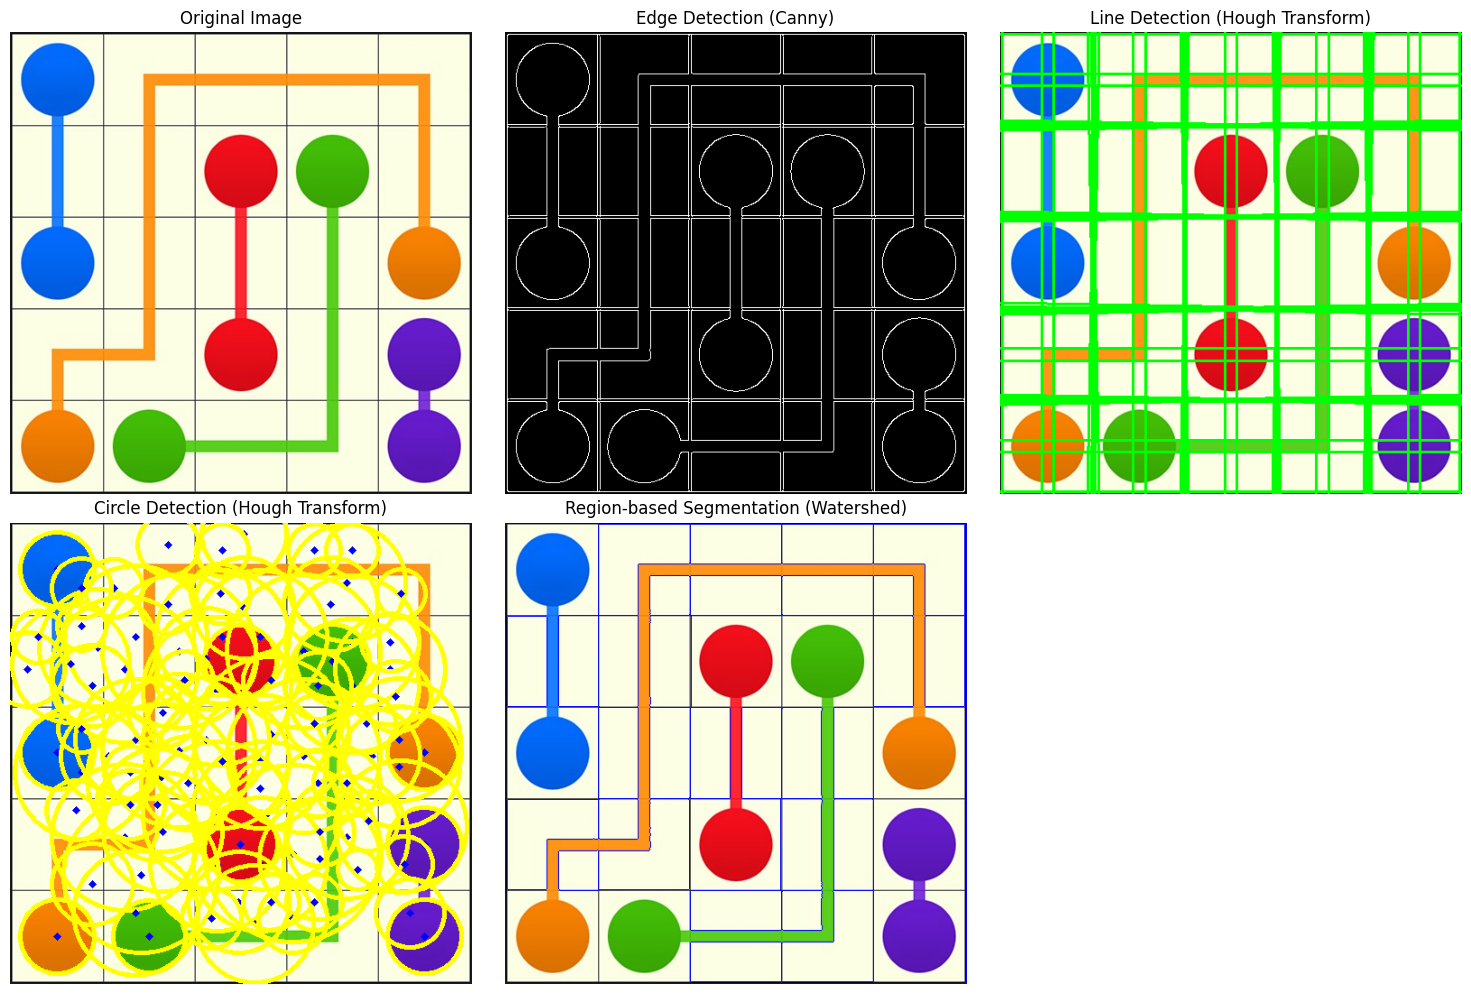

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def shape_segmentation(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 1)

# 1. Edge-based Segmentation: Using Canny Edge Detection
    edges = cv2.Canny(blurred, 50, 150)

# 2. Line Detection using Hough Transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
    img_lines = img.copy()
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(img_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 3. Circle Detection using Hough Transform
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,param1=50, param2=30, minRadius=10, maxRadius=100)
    img_circles = img.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for (x, y, r) in circles[0, :]:
            cv2.circle(img_circles, (x, y), r, (0, 255, 255), 3)
            cv2.circle(img_circles, (x, y), 2, (255, 0, 0), 3)

# 4. Region-based Segmentation: Watershed Algorithm
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = np.ones((3, 3), np.uint8)
    sure_bg = cv2.dilate(binary, kernel, iterations=2)
    dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    markers = cv2.connectedComponents(sure_fg)[1]
    markers = markers + 1
    markers[unknown == 255] = 0
    watershed_img = img.copy()
    markers = cv2.watershed(watershed_img, markers)
    watershed_img[markers == -1] = [255, 0, 0]

# Plot the results
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.title("Original Image")
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    plt.subplot(2, 3, 2)
    plt.title("Edge Detection (Canny)")
    plt.axis('off')
    plt.imshow(edges, cmap='gray')

    plt.subplot(2, 3, 3)
    plt.title("Line Detection (Hough Transform)")
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB))

    plt.subplot(2, 3, 4)
    plt.title("Circle Detection (Hough Transform)")
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img_circles, cv2.COLOR_BGR2RGB))

    plt.subplot(2, 3, 5)
    plt.title("Region-based Segmentation (Watershed)")
    plt.axis('off')
    plt.imshow(cv2.cvtColor(watershed_img, cv2.COLOR_BGR2RGB))

    plt.tight_layout()
    plt.show()

# Path to the image
image_path = 'Practical_11.jpg' # Replace with the path to your image
shape_segmentation(image_path)
print("Keshav Mishra CS24009")